# Dataset Preparation

In [ ]:
from huggingface_hub import snapshot_download
from PIL import Image
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import random, os, re, shutil

In [ ]:
# !git clone https://github.com/InhumanlyInsane/trashnet-clf.git
# !python trashnet-clf/dataset_collection.py

In [ ]:
# download dataset repo
snapshot_download(
    repo_id="garythung/trashnet",
    repo_type="dataset",
    local_dir="trashnet",
    ignore_patterns=["*.gitattributes"]
)

!unzip ./trashnet/dataset-resized.zip
!mv dataset-resized dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.txt:   0%|          | 0.00/208 [00:00<?, ?B/s]

constants.py:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

resize.py:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

dataset-original.zip:   0%|          | 0.00/3.63G [00:00<?, ?B/s]

dataset-resized.zip:   0%|          | 0.00/42.8M [00:00<?, ?B/s]

Archive:  ./trashnet/dataset-resized.zip
   creating: dataset-resized/
  inflating: dataset-resized/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/dataset-resized/
  inflating: __MACOSX/dataset-resized/._.DS_Store  
   creating: dataset-resized/cardboard/
  inflating: dataset-resized/cardboard/cardboard1.jpg  
  inflating: dataset-resized/cardboard/cardboard10.jpg  
  inflating: dataset-resized/cardboard/cardboard100.jpg  
  inflating: dataset-resized/cardboard/cardboard101.jpg  
  inflating: dataset-resized/cardboard/cardboard102.jpg  
  inflating: dataset-resized/cardboard/cardboard103.jpg  
  inflating: dataset-resized/cardboard/cardboard104.jpg  
  inflating: dataset-resized/cardboard/cardboard105.jpg  
  inflating: dataset-resized/cardboard/cardboard106.jpg  
  inflating: dataset-resized/cardboard/cardboard107.jpg  
  inflating: dataset-resized/cardboard/cardboard108.jpg  
  inflating: dataset-resized/cardboard/cardboard109.jpg  
  inflating: dataset-resized/cardboard/ca

# Exploratory Image Analysis

## Data Distribution

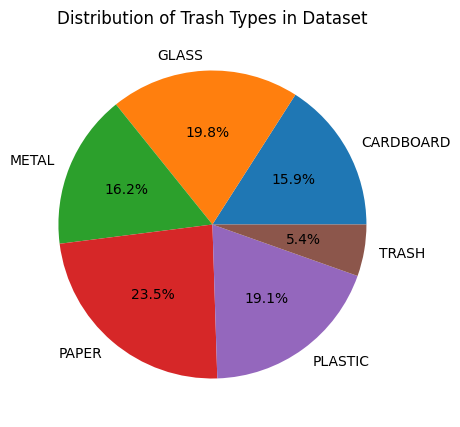

In [ ]:
import matplotlib.pyplot as plt

class_name = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
# Get class counts
class_counts = {name.upper(): len(os.listdir(f'./dataset/{name}'))
               for name in class_name}

# Create pie chart
plt.figure(figsize=(10, 5))
plt.pie(class_counts.values(),
       labels=class_counts.keys(),
       autopct='%1.1f%%')
plt.title('Distribution of Trash Types in Dataset')
plt.show()

In [ ]:
# class_name = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
class_dir = [dir for dir in os.listdir('dataset') if os.path.isdir(f'./dataset/{dir}')]

print("DATASET INFORMATION")
print()
total_files = 0
for i, class_name in enumerate(class_dir):
  file_count = len(os.listdir(f'./dataset/{class_name}'))
  total_files += file_count
  print(f"{class_name.upper()} Count:", file_count)

print()
print("Total Files:", total_files)

DATASET INFORMATION

GLASS Count: 501
METAL Count: 410
PLASTIC Count: 482
CARDBOARD Count: 403
PAPER Count: 594
TRASH Count: 137
Total Files: 2527


## Sample Images
In this section, we will be doing a direct examination on the images that we will be using across all different classes.

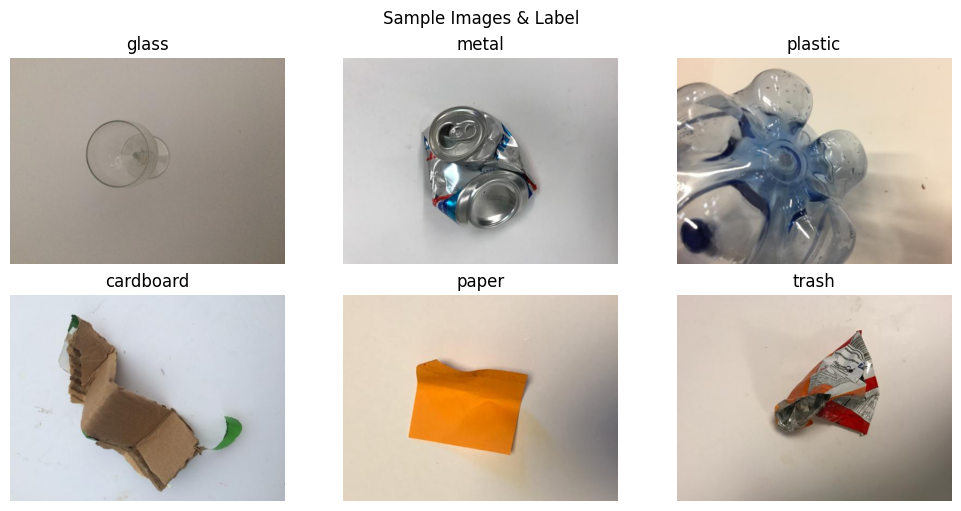

In [ ]:
import random

# image and label visualization
fig, axs = plt.subplots(2, 3, figsize=(10, 5), constrained_layout=True)

for idx, class_name in enumerate(class_dir):
   row = idx // 3
   col = idx % 3

   # Get first image path
   class_path = f'./dataset/{class_name}'
   idx = random.randint(0, len(os.listdir(class_path)))
   first_image = os.listdir(class_path)[idx]
   img_path = os.path.join(class_path, first_image)

   # Display image
   img = Image.open(img_path)
   axs[row, col].imshow(img)
   axs[row, col].set_title(class_name)
   axs[row, col].axis('off')

plt.suptitle("Sample Images & Label")
plt.show()

After viewing some of the sample images, one class seems to be quite similar with other classes. This class would be the **trash** class that has images intersected with other classes such as plastic and paper. Below, I tried to view more into this particular class to validate my thoughts.

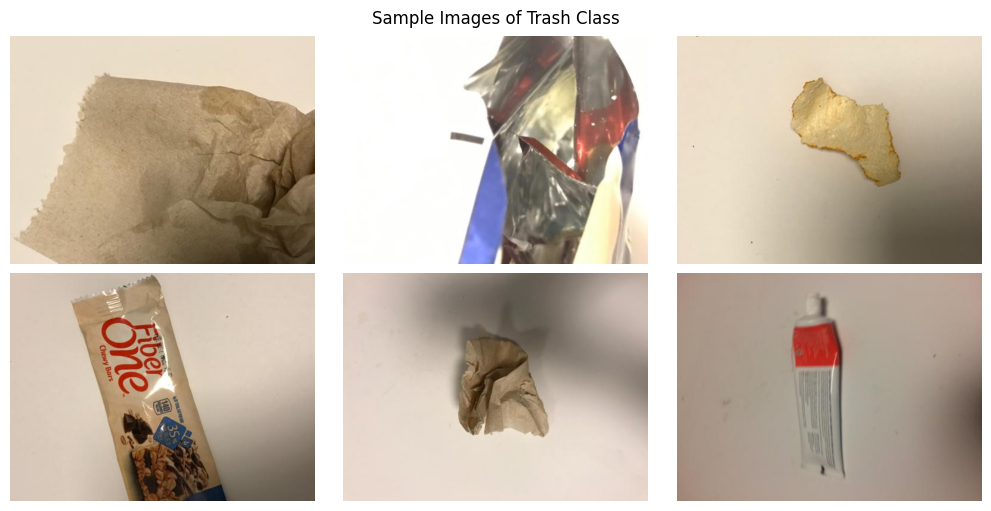

In [ ]:
import random

# image and label visualization
fig, axs = plt.subplots(2, 3, figsize=(10, 5), constrained_layout=True)

for idx, class_name in enumerate(class_dir):
   row = idx // 3
   col = idx % 3

   # Get first image path
   class_path = f'./dataset/trash'
   idx = random.randint(0, len(os.listdir(class_path)))
   first_image = os.listdir(class_path)[idx]
   img_path = os.path.join(class_path, first_image)

   # Display image
   img = Image.open(img_path)
   axs[row, col].imshow(img)
   axs[row, col].axis('off')

plt.suptitle("Sample Images of Trash Class")
plt.show()

And as can be seen, my propostiion is valid with images consisting of images that should have come from other existing classes. This would be really dangerous to be incorporated into the fine-tuning of the model since it'll be treated as noise. This noise would throw off the model for example to predict a trash class instead of what should be an image of plastic.

## Pixel Distribution

Processing glass...


100%|██████████| 501/501 [00:05<00:00, 91.82it/s]


Processing metal...


100%|██████████| 410/410 [00:05<00:00, 78.35it/s]


Processing plastic...


100%|██████████| 482/482 [00:05<00:00, 91.04it/s]


Processing cardboard...


100%|██████████| 403/403 [00:05<00:00, 75.32it/s]


Processing paper...


100%|██████████| 594/594 [00:06<00:00, 88.74it/s]


Processing trash...


100%|██████████| 137/137 [00:02<00:00, 67.10it/s]


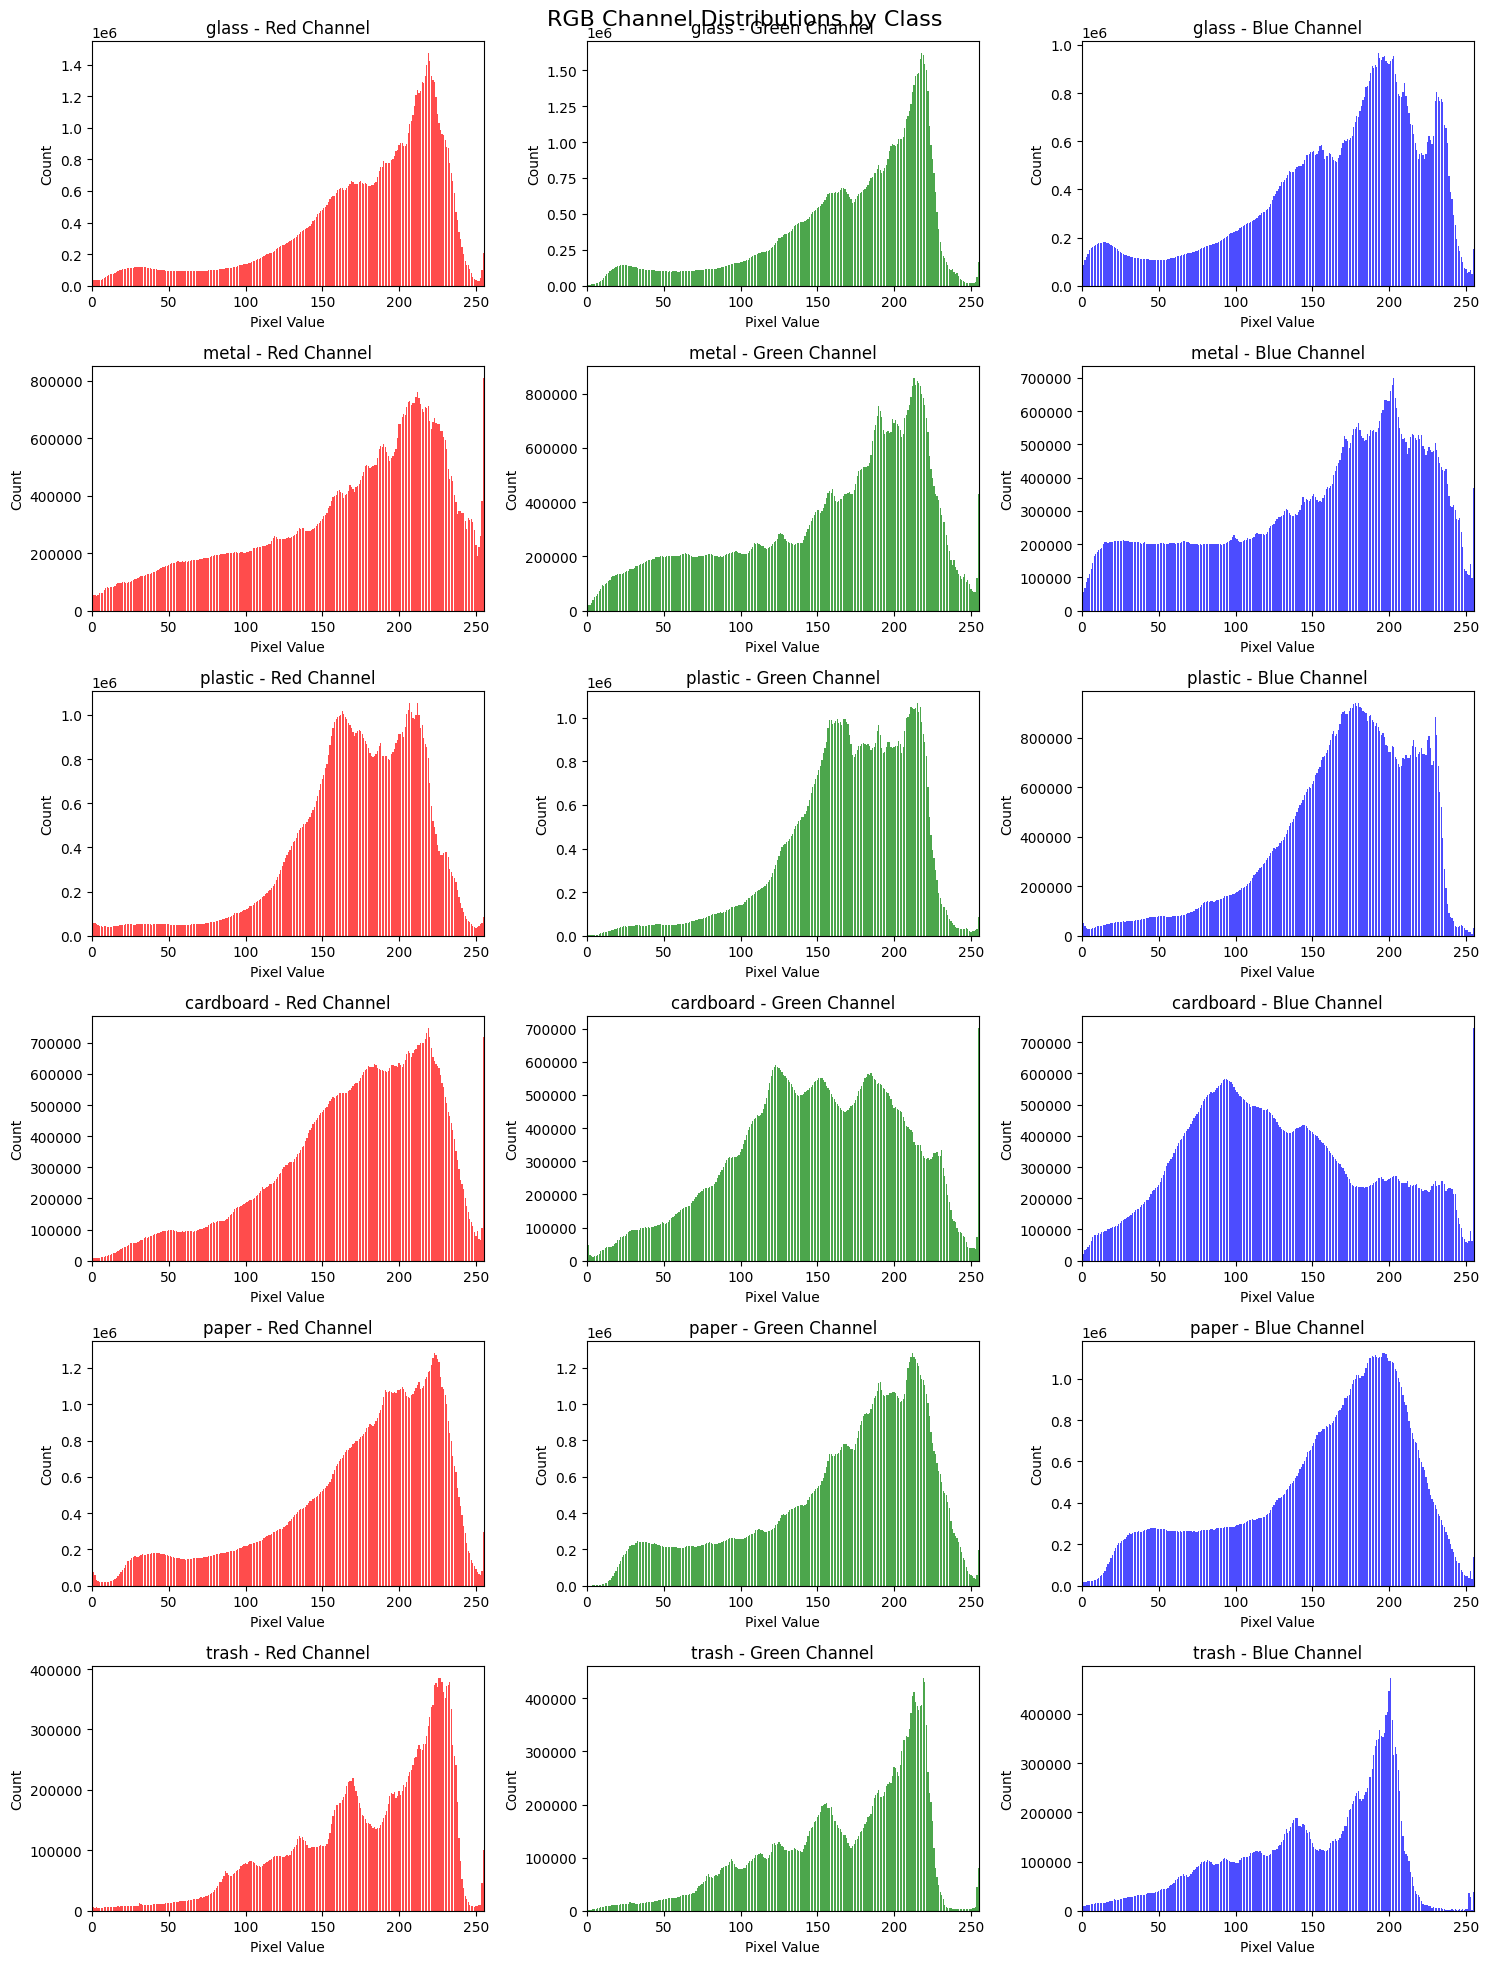

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

# Create subplot grid for all classes
fig, axes = plt.subplots(len(class_dir), 3, figsize=(15, 20))
fig.suptitle('RGB Channel Distributions by Class', fontsize=16)

# Plot distributions for each class
for class_idx, class_name in enumerate(class_dir):
    # Get path for class directory
    class_path = f'/content/dataset/{class_name}'

    # Initialize arrays for histograms
    r_hist = np.zeros(256)
    g_hist = np.zeros(256)
    b_hist = np.zeros(256)

    # Process images in batches
    print(f"Processing {class_name}...")
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = np.array(Image.open(img_path))

        # Update histograms
        r_hist += np.histogram(img[:,:,0], bins=256, range=(0,256))[0]
        g_hist += np.histogram(img[:,:,1], bins=256, range=(0,256))[0]
        b_hist += np.histogram(img[:,:,2], bins=256, range=(0,256))[0]

    # Plot histograms
    histograms = [(r_hist, 'Red'), (g_hist, 'Green'), (b_hist, 'Blue')]
    colors = ['red', 'green', 'blue']

    for ch_idx, (hist, channel_name) in enumerate(histograms):
        axes[class_idx, ch_idx].bar(range(256), hist, color=colors[ch_idx], alpha=0.7)
        axes[class_idx, ch_idx].set_title(f'{class_name} - {channel_name} Channel')
        axes[class_idx, ch_idx].set_xlabel('Pixel Value')
        axes[class_idx, ch_idx].set_ylabel('Count')
        axes[class_idx, ch_idx].set_xlim([0, 255])

plt.tight_layout()
plt.show()

The RGB pixel distributions analysis reveals that the image's pixels were consistently skewed towards the right across all classes. This finding highlighted a crucial consideration for our preprocessing pipeline, as such skewness could potentially impact model learning and generalization capabilities.